In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving lab3python.csv to lab3python.csv


In [16]:
# Importing the datasets
 
datasets = pd.read_csv(io.BytesIO(uploaded['lab3python.csv']))

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

In [33]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3798653eb0>,
      dtype=object)

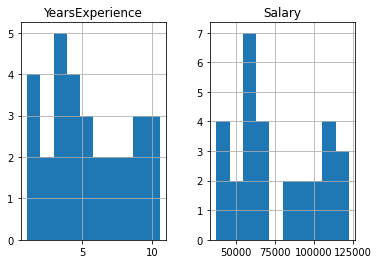

In [42]:
datasets.hist()

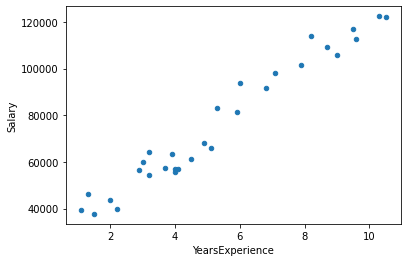

In [44]:
datasets.plot.scatter(x='YearsExperience', y = 'Salary')

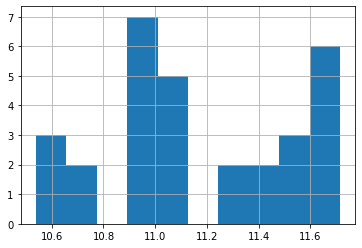

In [45]:
np.log1p(datasets['Salary']).hist()

In [46]:
np.log1p(datasets['Salary'])

0     10.580099
1     10.740865
2     10.538264
3     10.681114
4     10.593931
5     10.944524
6     11.004613
7     10.904965
8     11.073583
9     10.954134
10    11.054360
11    10.929440
12    10.950069
13    10.952244
14    11.020464
15    11.126366
16    11.097864
17    11.327668
18    11.306688
19    11.450422
20    11.426703
21    11.495515
22    11.525871
23    11.642312
24    11.603059
25    11.567253
26    11.669673
27    11.631917
28    11.714984
29    11.710735
Name: Salary, dtype: float64

In [47]:
y = (datasets['Salary']).values

X = datasets.select_dtypes(exclude=['object']).drop(columns=['Salary']).values

X[np.isnan(X)] = 0

Розбиваємо на 3 спліти:

In [51]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn = KNeighborsRegressor(n_neighbors = 10, n_jobs=-1) 

Використання метрик

In [52]:
knn.fit(train_X, (train_y))

KNeighborsRegressor(n_jobs=-1, n_neighbors=10)

In [53]:
np.sort(knn.predict(test_X))

array([51468.2, 52958.8, 55788.6, 59572.4, 68486.9, 72299.2, 93817.9,
       93817.9, 93817.9, 93817.9])

In [54]:
def RMSE(y_test, y_pred):
    return (sum((y_test - y_pred)**2)/len(y_test))**(0.5)

In [55]:
RMSE(test_y, (knn.predict(test_X)))

14894.604465678169

In [56]:
def MAE(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

In [57]:
MAE(test_y, knn.predict(test_X))

12196.23

In [58]:
def mape(y_test, y_pred): 
    return np.mean(np.abs((y_test+1 - y_pred) / (y_test+1))) * 100

In [59]:
mape(test_y, knn.predict(test_X))

14.136326050583206

In [60]:
from sklearn.metrics import r2_score

In [61]:
pred_y = knn.predict(test_X)
RMSE(test_y, pred_y), MAE(test_y, pred_y), mape(test_y, pred_y), r2_score(test_y, pred_y)

(14894.604465678169, 12196.23, 14.136326050583206, 0.7191295447078851)

Логарифмування Y

In [62]:
knn.fit(train_X, np.log(train_y))

KNeighborsRegressor(n_jobs=-1, n_neighbors=10)

In [63]:
np.exp(np.sort(knn.predict(test_X)))

array([50737.06057717, 52175.70723639, 55178.7661524 , 58740.9278768 ,
       67155.16715546, 70534.12654886, 91776.13667748, 91776.13667748,
       91776.13667748, 91776.13667748])

In [65]:
RMSE(test_y, np.exp(knn.predict(test_X)))

16172.296289352062

In [66]:
MAE(test_y, np.exp(knn.predict(test_X)))

13195.86746509386

In [67]:
mape(test_y, np.exp(knn.predict(test_X)))

14.993884068011315

In [68]:
pred_y = np.exp(knn.predict(test_X))
RMSE(test_y, pred_y), MAE(test_y, pred_y), mape(test_y, pred_y), r2_score(test_y, pred_y)

(16172.296289352062, 13195.86746509386, 14.993884068011315, 0.6688753689442406)

Підбір оптимальної кількості сусідів

In [69]:
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = i, metric='euclidean', n_jobs=-1)
    knn.fit(train_X, train_y)
    pred_y =  knn.predict(test_X)
    print(i, "- RMSE:",  RMSE(test_y, pred_y), "MAPE:", mape(test_y, pred_y), "R^2:", r2_score(test_y, pred_y), "MAE:", MAE(test_y, pred_y))

1 - RMSE: 8184.1922875748705 MAPE: 8.766690008254532 R^2: 0.915199237395396 MAE: 6423.4
2 - RMSE: 5700.718989741557 MAPE: 5.868237718545453 R^2: 0.9588559181113334 MAE: 4705.8
3 - RMSE: 5742.402445357207 MAPE: 5.801251698570828 R^2: 0.9582520302071582 MAE: 4626.333333333333
4 - RMSE: 6083.755526502524 MAPE: 6.182559224235311 R^2: 0.9531411510572622 MAE: 5087.075
5 - RMSE: 7304.96368368796 MAPE: 7.149717935723529 R^2: 0.9324408415580719 MAE: 5811.539999999998
6 - RMSE: 8958.280820621281 MAPE: 9.188085470582791 R^2: 0.8983991237466569 MAE: 7449.866666666666
7 - RMSE: 10263.881699673766 MAPE: 10.280238710210561 R^2: 0.8666259361214854 MAE: 8429.528571428573
8 - RMSE: 10814.066872452519 MAPE: 11.353082111948847 R^2: 0.8519439323454494 MAE: 9182.475
9 - RMSE: 12536.264496144135 MAPE: 11.678563933272953 R^2: 0.8010314652463872 MAE: 10026.9


Те саме із шкалюванням

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [71]:
scaler.fit(train_X)

x_train_scaled = scaler.transform(train_X)
x_test_scaled = scaler.transform(test_X)

In [72]:
np.min(x_test_scaled), np.max(x_test_scaled)

(-0.021739130434782608, 0.9782608695652175)

In [73]:
for i in range(10,20):
    knn = KNeighborsRegressor(n_neighbors = i, metric='euclidean') #BaggingRegressor(random_state=42, max_features=0.9)
    knn.fit(x_train_scaled, np.log1p(train_y))
    pred_y = knn.predict(x_test_scaled)
    print(i, "- RMSE:",  RMSE(test_y, np.exp(pred_y)), "MAPE:", mape(test_y, np.exp(pred_y)), "R^2:", r2_score(test_y, np.exp(pred_y)), "MAE:", MAE(test_y, np.exp(pred_y)))

10 - RMSE: 16171.627476417043 MAPE: 14.993354234815925 R^2: 0.6689027560082778 MAE: 13195.253660810642
11 - RMSE: 18485.750226269585 MAPE: 16.771144988529354 R^2: 0.5673643830692408 MAE: 14982.393062959873
12 - RMSE: 20544.68754025995 MAPE: 18.2554101220104 R^2: 0.46562369851112473 MAE: 16458.426913870004
13 - RMSE: 21527.344331083656 MAPE: 18.477403915389463 R^2: 0.41328252502556273 MAE: 16825.916019960474
14 - RMSE: 23240.99564319672 MAPE: 20.1591665763185 R^2: 0.31615517106580593 MAE: 18269.905374261845
15 - RMSE: 24346.95923252423 MAPE: 21.156340830858174 R^2: 0.2495226908365863 MAE: 19071.331634627735
16 - RMSE: 25347.710985066216 MAPE: 22.676496805925467 R^2: 0.18655985491776028 MAE: 20126.04982762001
17 - RMSE: 27438.159678791733 MAPE: 24.989995895140687 R^2: 0.04685699042459757 MAE: 22020.177357480436
18 - RMSE: 28991.10155673045 MAPE: 26.459241124340693 R^2: -0.06408799436149004 MAE: 23198.219092676725
19 - RMSE: 30560.110715322815 MAPE: 28.21857708388341 R^2: -0.1823823966165

Звичайна лінійна регресія в sklearn

In [74]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1, normalize=True )

lin_reg.fit(train_X, train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(25324.335379244294, array([9426.03876907]))

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1, normalize=True )

lin_reg.fit(train_X[:,:], train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(25324.335379244294, array([9426.03876907]))

In [76]:
np.sort(lin_reg.predict(test_X))

array([ 35692.97802523,  55487.65944028,  60200.67882482,  63028.49045554,
        71511.92534771,  75282.34085534, 102617.85328566, 107330.8726702 ,
       115814.30756236, 122412.53470072])

Збільшення точності моделі: замінили нулями + перевірка для Train

In [77]:
lin_reg = LinearRegression()

In [79]:
lin_reg.fit(train_X, train_y)

LinearRegression()

In [80]:
pred_y = lin_reg.predict(test_X)

pred_y[pred_y < 0] = 0

pred_y

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [81]:
np.sort(lin_reg.predict(test_X))

array([ 35692.97802523,  55487.65944028,  60200.67882482,  63028.49045554,
        71511.92534771,  75282.34085534, 102617.85328566, 107330.8726702 ,
       115814.30756236, 122412.53470072])

In [82]:
RMSE(test_y, pred_y), mape(test_y, pred_y), r2_score(test_y, pred_y), MAE(test_y, pred_y)

(5941.540110706558, 6.8352018397243, 0.9553063138044949, 4956.5232614449005)

In [83]:
pred_train = lin_reg.predict(train_X)

RMSE(train_y, pred_train), mape(train_y, pred_train), r2_score(train_y, pred_train), MAE(train_y, pred_train)

(5458.311193255931, 7.025688286517213, 0.9549236946181227, 4472.274104679318)

Збільшення інтерпретабельності моделі

Збільшення інтерпретабельності моделі: без нормалізації

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1, normalize=False )

lin_reg.fit(train_X, train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


(25324.33537924433, array([9426.03876907]))

Збільшення інтерпретабельності моделі: без константи

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1, normalize=False, fit_intercept=False)

lin_reg.fit(train_X, train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


(0.0, array([13361.40787519]))

In [86]:
pred_y = lin_reg.predict(test_X)

pred_y[pred_y < 0] = 0

pred_y

array([128269.51560178,  65470.89858841, 109563.54457652,  70815.46173848,
        42756.50520059,  49437.20913819, 137622.50111441, 116244.24851412,
        53445.63150074,  14697.5486627 ])

In [87]:
MAE(test_y, pred_y)

11426.446582466571

Збільшення інтерпретабельності моделі: лише додатні значення коефіцієнтів

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1, normalize=False, fit_intercept=False, positive=True)

lin_reg.fit(train_X, train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


(0.0, array([13361.40787519]))

In [89]:
datasets.select_dtypes(exclude=['object']).drop(columns=['Salary']).columns

Index(['YearsExperience'], dtype='object')

In [90]:
pred_y = lin_reg.predict(test_X)

In [91]:
MAE(test_y, pred_y)

11426.446582466571

Збільшення інтерпретабельності моделі: перевірка припущення про мультиколінеарність

In [92]:
datasets.select_dtypes(exclude=['object']).drop(columns=['Salary']).columns

Index(['YearsExperience'], dtype='object')

Виключаються попередньо мультиколінеарні

In [94]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1, normalize=False, fit_intercept=False, positive=True)

lin_reg.fit(train_X[:,:], train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


(0.0, array([13361.40787519]))

In [95]:
MAE(test_y, pred_y)

11426.446582466571

In [96]:
datasets.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Поліномні фічі

In [97]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) 

In [98]:
X_poly = poly_features.fit_transform(train_X)

In [99]:
X_poly.shape, train_X.shape

((20, 2), (20, 1))

In [100]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
poly_features.fit(train_X)
lin_reg = LinearRegression(n_jobs=-1)
X_poly_train = poly_features.transform(train_X)
X_poly_test = poly_features.transform(test_X)
lin_reg.fit(X_poly_train, train_y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.get_params

(25972.78367942047,
 array([9127.57548935,   26.30749641]),
 <bound method BaseEstimator.get_params of LinearRegression(n_jobs=-1)>)

In [101]:
def RMSE(y_test, y_pred):
    return (sum((y_test - y_pred)**2)/len(y_test))**(0.5)

In [102]:
RMSE(train_y, lin_reg.predict(X_poly_train))

5455.311325716874

In [103]:
pred_y = np.round(lin_reg.predict(X_poly_test))

pred_y[pred_y <= 0] = 0

RMSE(test_y, pred_y)

5941.324103261831

In [104]:
MAE(test_y, pred_y)

4960.3

In [105]:
np.sort(pred_y)

array([ 36045.,  55450.,  60105.,  62904.,  71330.,  75088., 102588.,
       107374., 116022., 122778.])

In [106]:
np.sort(lin_reg.predict(X_poly_test))

array([ 36044.94878836,  55450.41400859,  60104.96261588,  62904.00557939,
        71329.54656605,  75087.91134715, 102587.81875072, 107373.90484007,
       116022.00724636, 122777.7735139 ])

In [107]:
for i in range(1,5):
    poly_features = PolynomialFeatures(degree=i, include_bias=False) 
    X_poly = poly_features.fit_transform(train_X)
    print(X_poly.shape)
    X_poly_test = poly_features.fit_transform(test_X)
    lin_reg = LinearRegression()    
    lin_reg.fit(X_poly, train_y)
    pred_y = np.round(lin_reg.predict(X_poly_test))
    pred_y[pred_y <= 0] = 0
    print(str(i)+": "+str(round(RMSE(train_y, lin_reg.predict(X_poly)),4))+" R^2: "+ str(round(r2_score(train_y, lin_reg.predict(X_poly)),4)))
    print(str(i)+": "+str(round(RMSE(test_y, pred_y),4))+" R^2: "+ str(round(r2_score(test_y, pred_y),4)))

(20, 1)
1: 5458.3112 R^2: 0.9549
1: 5941.4544 R^2: 0.9553
(20, 2)
2: 5455.3113 R^2: 0.955
2: 5941.3241 R^2: 0.9553
(20, 3)
3: 5022.1801 R^2: 0.9618
3: 5504.3035 R^2: 0.9616
(20, 4)
4: 4984.446 R^2: 0.9624
4: 5645.0339 R^2: 0.9597


In [108]:
np.sort(pred_y)

array([ 42311.,  52923.,  57785.,  60927.,  70924.,  75470., 104848.,
       108861., 115350., 119945.])

Додаємо препроцесинг - нормалізацію

In [109]:
from sklearn.preprocessing import Normalizer

In [110]:
transformer = Normalizer().fit(train_X) 
X_norm = transformer.transform(train_X)

In [112]:
from scipy import stats
stats.skew(X_norm[:,:]),stats.skew(train_X[:,:]), stats.kurtosis(X_norm[:,:]),stats.kurtosis(train_X[:,:])

(array([0.]), array([0.48970116]), array([-3.]), array([-0.82272798]))

In [113]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(train_X) 
X_train_norm = transformer.transform(train_X)
X_test_norm = transformer.transform(test_X)

lin_reg = LinearRegression(n_jobs=-1, normalize=True)
lin_reg.fit(X_train_norm, train_y)

lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(72643.05, array([0.]))

In [114]:
RMSE(test_y, lin_reg.predict(X_test_norm))

29857.43786584006

In [115]:
from sklearn.preprocessing import Normalizer

for i in range(1,4):
    poly_features = PolynomialFeatures(degree=i, include_bias=False) 
    X_poly = poly_features.fit_transform(train_X)
    X_poly_test = poly_features.fit_transform(test_X)
    transformer = Normalizer().fit(X_poly) 
    X_poly = transformer.transform(X_poly)
    X_poly_test = transformer.transform(X_poly_test)
    lin_reg = LinearRegression()    
    lin_reg.fit(X_poly, train_y)
    pred_y = np.round(lin_reg.predict(X_poly_test))
    pred_y[pred_y <= 0] = 0
    print(str(i)+": "+str(round(RMSE(test_y, pred_y),4))+" R^2: "+ str(round(r2_score(test_y, pred_y),4)) +"MAE: "+str(round(MAE(test_y, pred_y),4)))

1: 29857.4547 R^2: -0.1286MAE: 25548.5
2: 11523.6172 R^2: 0.8319MAE: 9120.2
3: 6983.4549 R^2: 0.9383MAE: 5655.2


In [116]:
lin_reg.intercept_, lin_reg.coef_

(-2455939.713413221,
 array([2374894.10422006, -724807.68841223, 2632621.68260185]))

Decision Tree Regression

In [126]:
from sklearn.tree import DecisionTreeRegressor


In [118]:
dt_reg = DecisionTreeRegressor(
    criterion='mae',
    max_depth=18, 
    min_samples_leaf=29, 
    max_features=0.9, 
    random_state=42)

In [119]:
dt_reg.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=18, max_features=0.9,
                      min_samples_leaf=29, random_state=42)

In [120]:
np.mean(test_y)

82722.9

In [122]:
np.median(datasets['Salary'])

65237.0

In [123]:
pred_y = dt_reg.predict(test_X)
print("RMSE:",  RMSE(test_y, pred_y), 
      "MAE:",  MAE(test_y, pred_y),
          "MAPE:", mape(test_y, pred_y), 
          "R^2:", r2_score(test_y, pred_y))

RMSE: 34821.129080631494 MAE: 27159.3 MAPE: 29.565628979164003 R^2: -0.535089873685801


In [132]:
from sklearn.ensemble import BaggingRegressor
for i in [0.8, 0.85, 0.9, 0.95]:
    dt_reg = BaggingRegressor(DecisionTreeRegressor(
    criterion='mse',
    max_depth=18, 
    min_samples_leaf=10, 
    max_features=i, 
    random_state=42), 
    random_state=42)
    dt_reg.fit(train_X, train_y)
    pred_y = dt_reg.predict(test_X)
    print(i, "- RMSE:",  RMSE(test_y, pred_y), 
        "MAE:", MAE(test_y, pred_y), 
        "MAPE:", mape(test_y, pred_y), 
        "R^2:", r2_score(test_y, pred_y))

0.8 - RMSE: 29108.891754335564 MAE: 25548.5 MAPE: 32.827306684352834 R^2: -0.07275229157223939
0.85 - RMSE: 29108.891754335564 MAE: 25548.5 MAPE: 32.827306684352834 R^2: -0.07275229157223939
0.9 - RMSE: 29108.891754335564 MAE: 25548.5 MAPE: 32.827306684352834 R^2: -0.07275229157223939
0.95 - RMSE: 29108.891754335564 MAE: 25548.5 MAPE: 32.827306684352834 R^2: -0.07275229157223939
